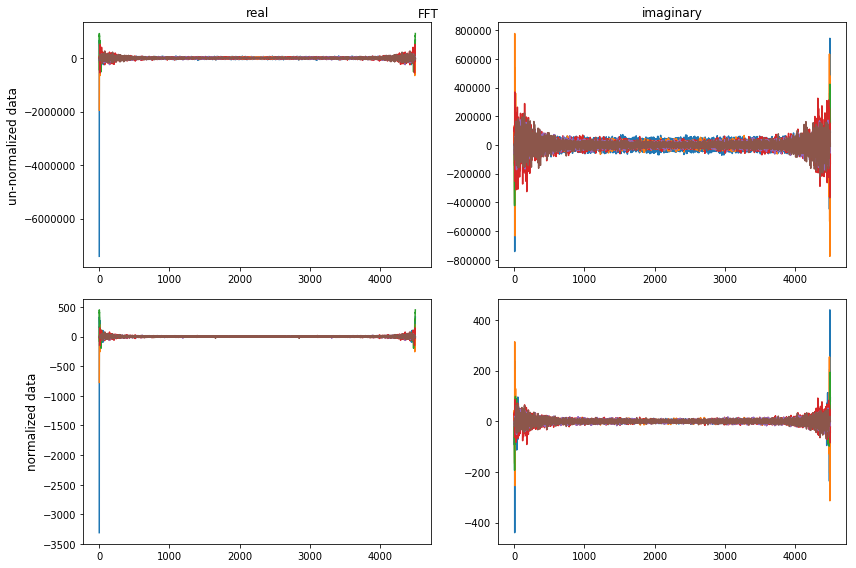

In [34]:
# --------------------------------------------------
#
# Compare FFT with un-normalized/normalized data
#
# --------------------------------------------------
# %matplotlib inline
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

FILE = 'data/pills-s0.npy'
x = np.load(FILE)
X = normalize(x)

xf = np.fft.fft(x, axis=0)
Xf = np.fft.fft(X, axis=0)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
cols = ['real', 'imaginary']
rows = ['un-normalized data', 'normalized data']

# un-normalized data
ax = axes[0]
ax[0].plot(xf.real)
ax[1].plot(xf.imag)
# normalized data
ax = axes[1]
ax[0].plot(Xf.real)
ax[1].plot(Xf.imag)

# set row/col titles
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

fig.tight_layout()
plt.suptitle('FFT')
plt.show()

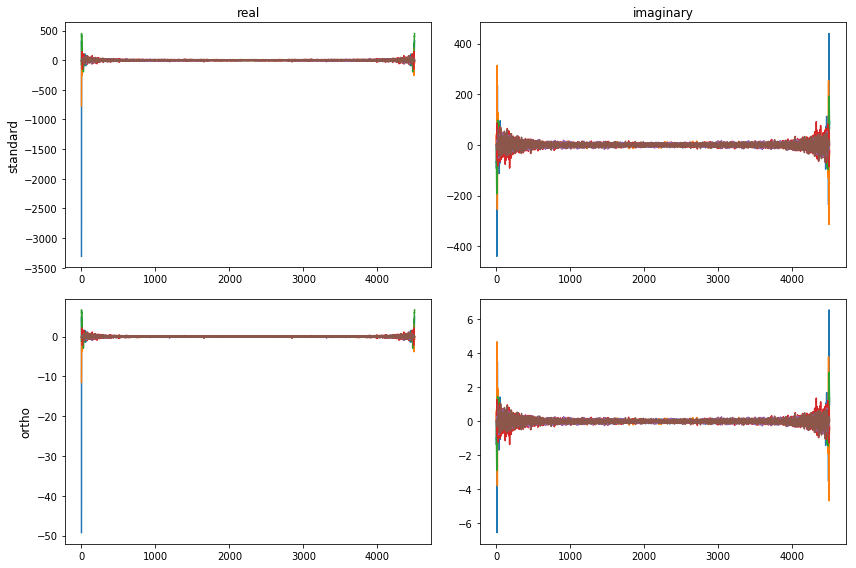

In [39]:
# --------------------------------------------------
#
# Compare FFT using different 'norm' methods
#
# --------------------------------------------------
# %matplotlib inline
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

FILE = 'data/pills-s0.npy'
x = np.load(FILE)
X = normalize(x)

xf = np.fft.fft(X, axis=0, norm=None)
Xf = np.fft.fft(X, axis=0, norm='ortho')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
cols = ['real', 'imaginary']
rows = ['standard', 'ortho']

# un-normalized data
ax = axes[0]
ax[0].plot(xf.real)
ax[1].plot(xf.imag)
# normalized data
ax = axes[1]
ax[0].plot(Xf.real)
ax[1].plot(Xf.imag)

# set row/col titles
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

fig.tight_layout()
plt.show()

In [27]:
# --------------------------------------------------
#
# Scatter-Plot representation of the FFT
#
# --------------------------------------------------
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt

FILE = 'data/pills-s0.npy'
x = np.load(FILE)

xf = np.fft.fft(x, axis=0)
print(xf.real.shape)
print(xf.imag.shape)

N = xf.shape[1]
cmap = plt.get_cmap('jet')
colors = [cmap(int((i/N)*cmap.N)) for i in range(N)]
print('colors', colors)

fig = plt.figure()
ax1 = plt.subplot(1,2,1)
s1 = ax1.scatter(xf.real, xf.imag, c=colors)


ax2 = plt.subplot(1,2,2, projection='polar')
ax2.scatter(xf.real, xf.imag, c=colors)

plt.show()

(4506, 6)
(4506, 6)
colors [(0.0, 0.0, 0.5, 1.0), (0.0, 0.1588235294117647, 1.0, 1.0), (0.0, 0.8333333333333334, 1.0, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (1.0, 0.9012345679012348, 0.0, 1.0), (1.0, 0.27668845315904156, 0.0, 1.0)]


(4506, 6)
(4506, 6)
(4506, 6)


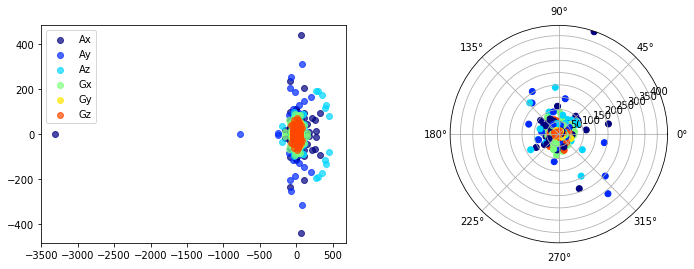

In [38]:
# --------------------------------------------------
#
# Normalized Scatter-Plot representation of the FFT
#
# --------------------------------------------------
%matplotlib inline
# %matplotlib tk

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

FILE = 'data/pills-s0.npy'
x = np.load(FILE)
x = normalize(x)
print(x.shape)


xf = np.fft.fft(x, axis=0)
print(xf.real.shape)
print(xf.imag.shape)

N = xf.shape[1]
cmap = plt.get_cmap('jet')
colors = [cmap(int((i/N)*cmap.N)) for i in range(N)]
lbls = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1,2,1)
for i in range(N):
    ax1.scatter(xf.real[:,i], xf.imag[:,i], c=colors[i], label=lbls[i], alpha=.7)
ax1.legend()


ax2 = plt.subplot(1,2,2, projection='polar')
ax2.scatter(xf.real, xf.imag, c=colors)

plt.show()